In [1]:
import polartoolkit
import verde as vd
import invert4geom
import numpy as np
import pandas as pd
import harmonica
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2
from polartoolkit import fetch, maps, profiles, regions

In [3]:
import os

os.environ["POLARTOOLKIT_HEMISPHERE"] = "south"

region = regions.getz_ice_shelf

# Point Data

In [12]:
bm_1 = fetch.bedmap_points(version='bedmap1',region = region)
bm_2 = fetch.bedmap_points(version='bedmap2',region = region)
bm_3 = fetch.bedmap_points(version='bedmap3',region = region)

C:\Users\iii\AppData\Local\Temp\ipykernel_11856\2388871410.py:1: UserWarning: Consider installing pyarrow for faster performance when reading geodataframes.
  bm_1 = fetch.bedmap_points(version='bedmap1',region = region)
C:\Users\iii\AppData\Local\Temp\ipykernel_11856\2388871410.py:2: UserWarning: Consider installing pyarrow for faster performance when reading geodataframes.
  bm_2 = fetch.bedmap_points(version='bedmap2',region = region)
C:\Users\iii\AppData\Local\Temp\ipykernel_11856\2388871410.py:3: UserWarning: Consider installing pyarrow for faster performance when reading geodataframes.
  bm_3 = fetch.bedmap_points(version='bedmap3',region = region)


## Creation of CSVs

In [24]:
if os.path.exists('pointmaps') == False:
    os.mkdir('pointmaps')

In [25]:
df = pd.DataFrame(bm_1)
df.to_csv('pointmaps/bm1.csv')

df = pd.DataFrame(bm_2)
df.to_csv('pointmaps/bm2.csv')

df = pd.DataFrame(bm_3)
df.to_csv('pointmaps/bm3.csv')

In [29]:
#bm1 = pd.read_csv('pointmaps/bm1.csv')

In [26]:
BM = pd.concat([bm_1[['longitude (degree_east)','latitude (degree_north)','bedrock_altitude (m)','easting','northing']],
                bm_2[['longitude (degree_east)','latitude (degree_north)','bedrock_altitude (m)','easting','northing']],
                bm_3[['longitude (degree_east)','latitude (degree_north)','bedrock_altitude (m)','easting','northing']]])

BM.rename(columns={'bedrock_altitude (m)' : 'bedrock_altitude' }, inplace = True)

In [27]:
df = pd.DataFrame(BM)
df.to_csv('pointmaps/BM.csv')

<Axes: xlabel='easting', ylabel='northing'>

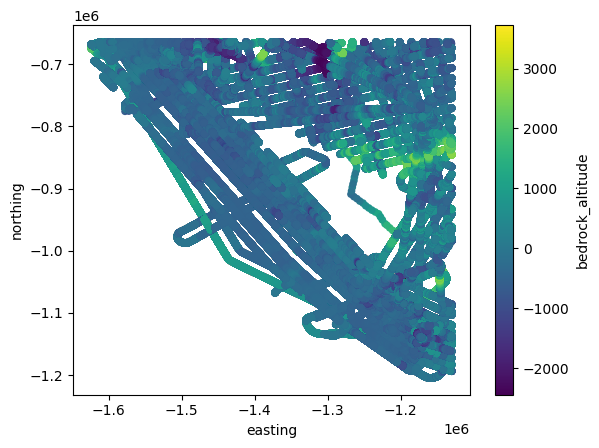

In [28]:
#BM.plot.scatter(x='longitude (degree_east)',y= 'latitude (degree_north)', c='bedrock_altitude (m)',cmap= 'viridis')
BM.plot.scatter(x='easting',y= 'northing', c='bedrock_altitude',cmap= 'viridis')
#uninterpolated data

# Grids

In [9]:
ice_surface = fetch.bedmap3(layer="surface_topography", region = region)
ice_thickness = fetch.bedmap3(layer="ice_thickness", region = region)
bed_topography = fetch.bedmap3(layer="bed_topography", region = region)

In [10]:
gc = fetch.gravity(version = "antgg-2021", region = region,anomaly_type='FA')

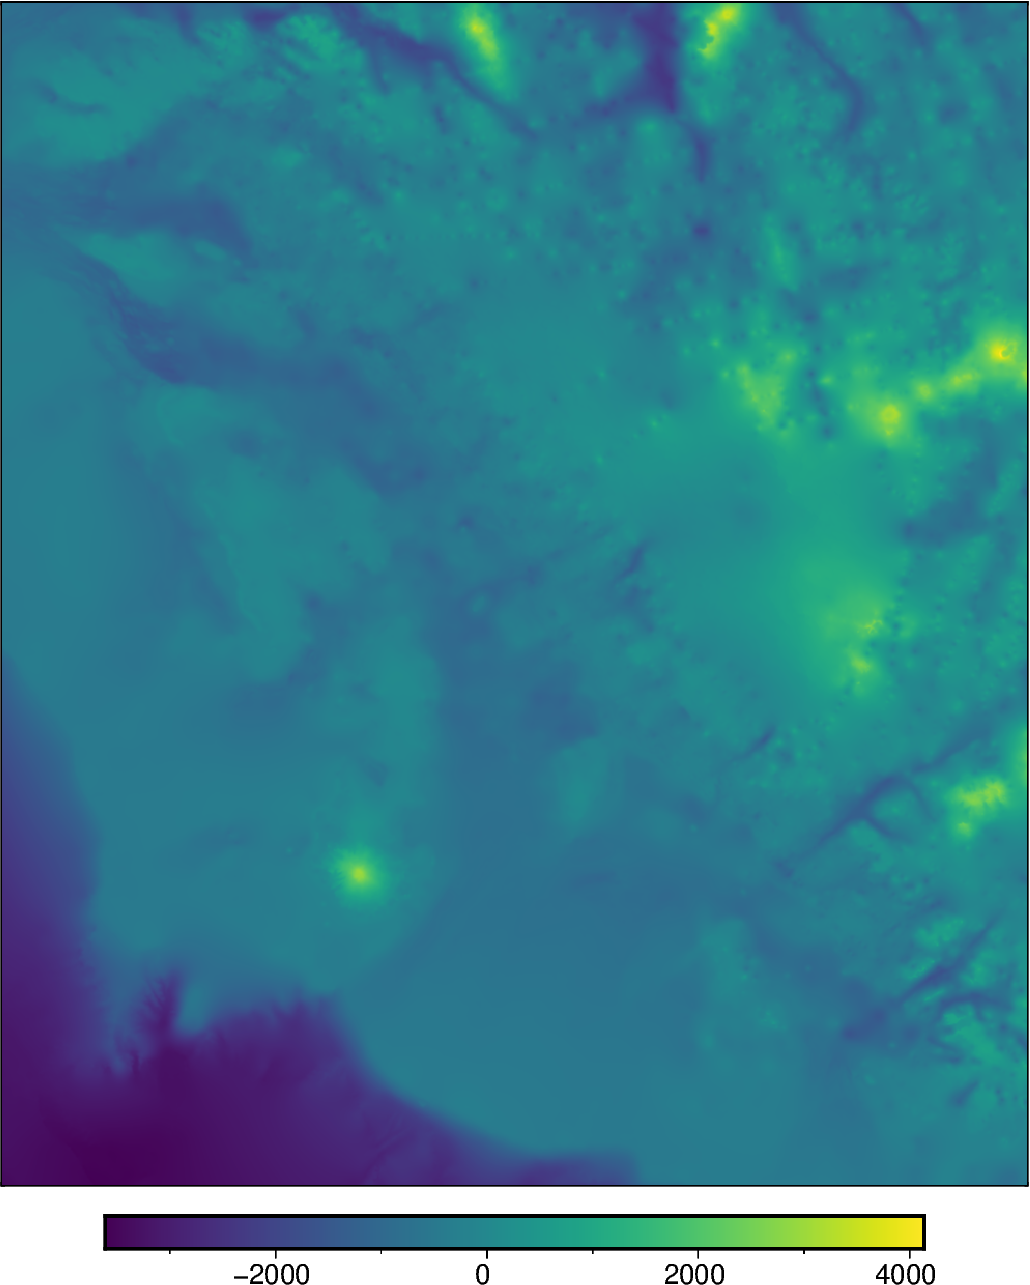

In [11]:
fig1 =maps.plot_grd(ice_surface)
fig2 =maps.plot_grd(ice_thickness)
fig3 =maps.plot_grd(bed_topography)
#fig4 =maps.plot_grd(gc)

#fig = maps.subplots([fig1,fig2])
fig3.show(dpi=200)